## Metropolis-Hastings Review 

This notebook is an ongoing exploration of use-cases for the MCMC style Metropolis-Hastings (MH) algorith. The algorithm aims to generate random variables from a target probability density with function $f$, using a conditional probability density with function $q$, such that a Markov chain $X^{(t)}$ is genereated on-line. This is produced through the surprisingly simple kernel given $x^{(t)}$ as follows:

>Generate $Y_t \sim q(y | x^{(t)})$ 

>Take 
$$
X^{(t+1)} = 
\begin{cases}
Y_t \text{ , with probability } \rho(x^{(t)},Y_t)\\
x^{(t)} \text{ , with probability } 1-\rho(x^{(t)},Y_t)\\
\end{cases} 
\\
\\
\\
\\
\text{where } \rho(x^{(t)},Y_t) = \min \bigg\{ \dfrac{f(y)}{f(x)}\dfrac{q(x|y)}{q(y|x)},1 \bigg\}
$$

1. Beta distribution

In [7]:
#Generate beta-distributed variables using MH-algorithm.
from scipy.stats import beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
a = 2.7
b = 6.3
c = 2.669
N = 10000
X = np.random.uniform(0.0,1.0,N)
for i in range(1,N):
    Y = np.random.uniform(0.0,1.0)
    rho = beta.pdf(Y, a, b)/beta.pdf(X[i-1], a, b)
    if np.random.uniform(0.0,1.0) < rho:
        X[i] = Y
    else:
        X[i] = X[i-1]


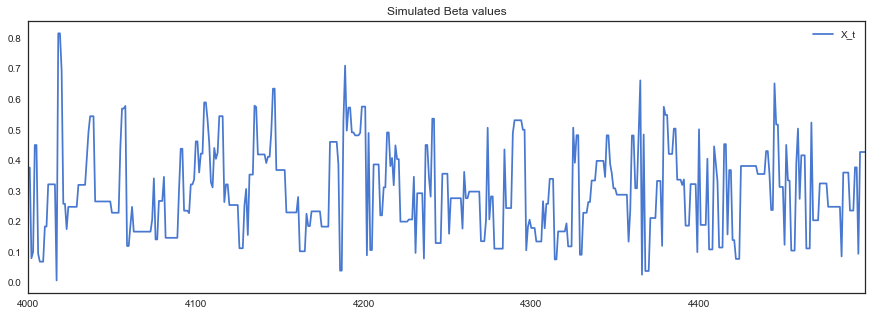

In [8]:

sim_X = pd.DataFrame({'X_t':X})
plotdata=sim_X.iloc[4000:4500,:]
plt.figure()
plotdata.plot(figsize=(15,5), title="Simulated Beta values")

beta_true = np.random.beta(a,b,N)
true_X = pd.DataFrame({'Beta':beta_true})

[Text(0.5,0,'Comparison')]

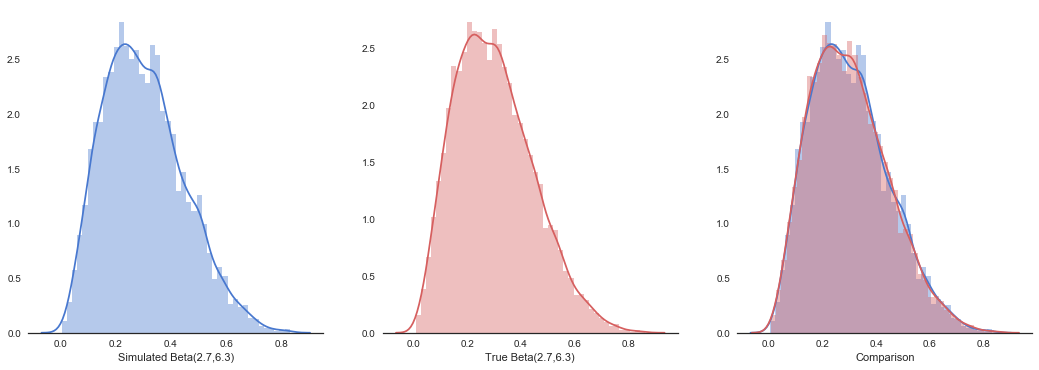

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False)
sns.despine(left=True)
ax = sns.distplot(sim_X, kde=True, color="b", ax=axes[0])
ax.set(xlabel=f'Simulated Beta({a},{b})')
ax2 = sns.distplot(true_X, kde=True, color="r", ax=axes[1])
ax2.set(xlabel=f'True Beta({a},{b})')
ax = sns.distplot(sim_X, kde=True, color="b", ax=axes[2])
ax2 = sns.distplot(true_X, kde=True, color="r", ax=axes[2])
ax.set(xlabel='Comparison')

In [14]:
#perform kolmogorov-smirnov test on the sample distribution
from scipy import stats
stats.kstest(sim_X,'beta',args=(a,b),alternative='two-sided') #continuous test

KstestResult(statistic=0.99993159656980024, pvalue=0.0)

In [21]:
stats.ks_2samp(sim_X['X_t'], true_X['Beta'])

Ks_2sampResult(statistic=0.013000000000000012, pvalue=0.36463448579373375)

More specific applications of the MH algorithm is to explore the Markov chain in a local manner such that $Y_t = X^{(t)} + \epsilon_t$ for each step $t$. Here, $\epsilon_t$ is a 'noise' parameter with dristribution g (e.g. uniform or normal). The proposal density then becomes $g(y-x)$, and the full algorithm is expressed, given $x^{(t)}$, as below:



>Generate $Y_t \sim g(y - x^{(t)})$ 

>Take 
$$
X^{(t+1)} = 
\begin{cases}
Y_t \text{ , with probability } \rho(x^{(t)},Y_t)\\
x^{(t)} \text{ , with probability } 1-\rho(x^{(t)},Y_t)\\
\end{cases} 
\\
\\
\\
\\
\text{where } \rho(x^{(t)},Y_t) = \min \bigg\{ \dfrac{f(Y_t)}{f(x^{(t)})},1 \bigg\}
$$

Note that the difference from the general MH algorithm is only the acceptance probability. In this regime we can try simulate some distributions.

2. Normal distribution $N(0,1)$ based on the accepance probability: $$\rho(x^{(t)},Y_t) = exp{(x^2 - y^2)/2}$$ where we generate the chain with a uniform distribtion $U(-\delta, \delta)$ for some varying parameter $\delta$.

In [29]:
#Generate normal distribution random variables using MH-algorithm.
from scipy.stats import beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Acceptance probability condenses to the below
def rho_accept(x,y):
    exp_val = np.exp((x**2 -y**2)/2)
    return np.min([1,exp_val])

a = -1
b = 1
mu = 0
sigma = 1

N = 10000
X = np.random.uniform(a,b,N) 
for i in range(1,N):
    epsilon = np.random.uniform(a,b)
    Y_t = X[i-1] + epsilon
    rho = rho_accept(X[i-1],Y_t)
    if np.random.uniform(0,1) < rho:
        X[i] = Y_t
    else:
        X[i] = X[i-1]

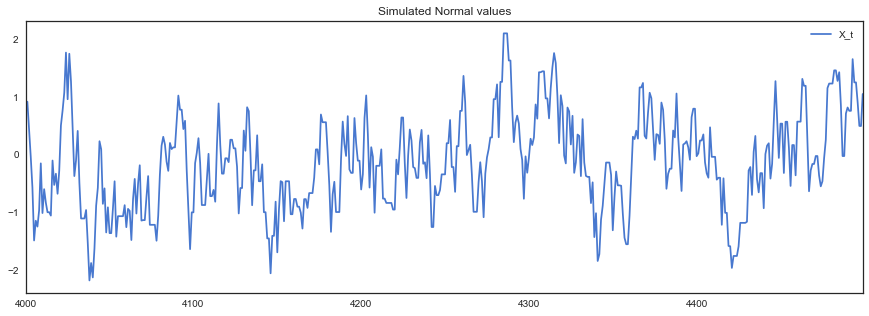

In [30]:
sim_X = pd.DataFrame({'X_t':X})
plotdata=sim_X.iloc[4000:4500,:]
plt.figure()
plotdata.plot(figsize=(15,5), title="Simulated Normal values")

norm_true = np.random.normal(0,1,N)
true_X = pd.DataFrame({'Normal':norm_true})

[Text(0.5,0,'Comparison')]

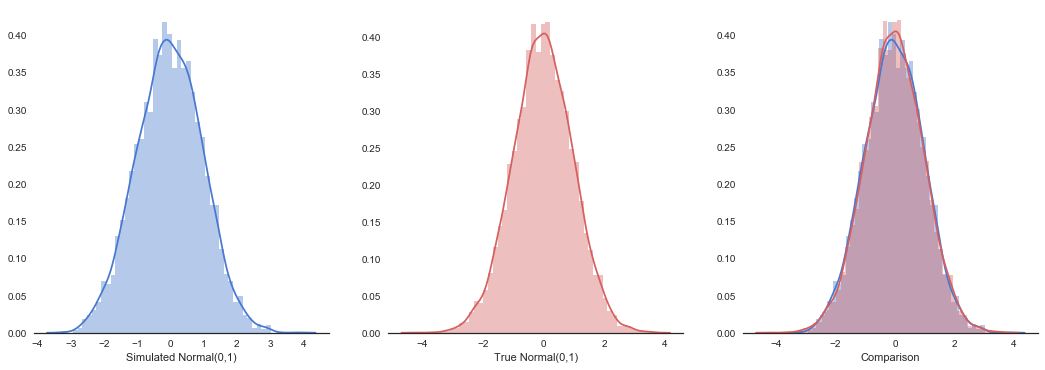

In [31]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False)
sns.despine(left=True)
ax = sns.distplot(sim_X, kde=True, color="b", ax=axes[0])
ax.set(xlabel=f'Simulated Normal({mu},{sigma})')
ax2 = sns.distplot(true_X, kde=True, color="r", ax=axes[1])
ax2.set(xlabel=f'True Normal({mu},{sigma})')
ax = sns.distplot(sim_X, kde=True, color="b", ax=axes[2])
ax2 = sns.distplot(true_X, kde=True, color="r", ax=axes[2])
ax.set(xlabel='Comparison')

In [32]:
stats.ks_2samp(sim_X['X_t'], true_X['Normal'])

Ks_2sampResult(statistic=0.011400000000000021, pvalue=0.53200970626836097)